# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis 

In [122]:
df = pd.read_csv('./data/Advertising.csv',sep=",")
df.head()

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,69.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newpaper    200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


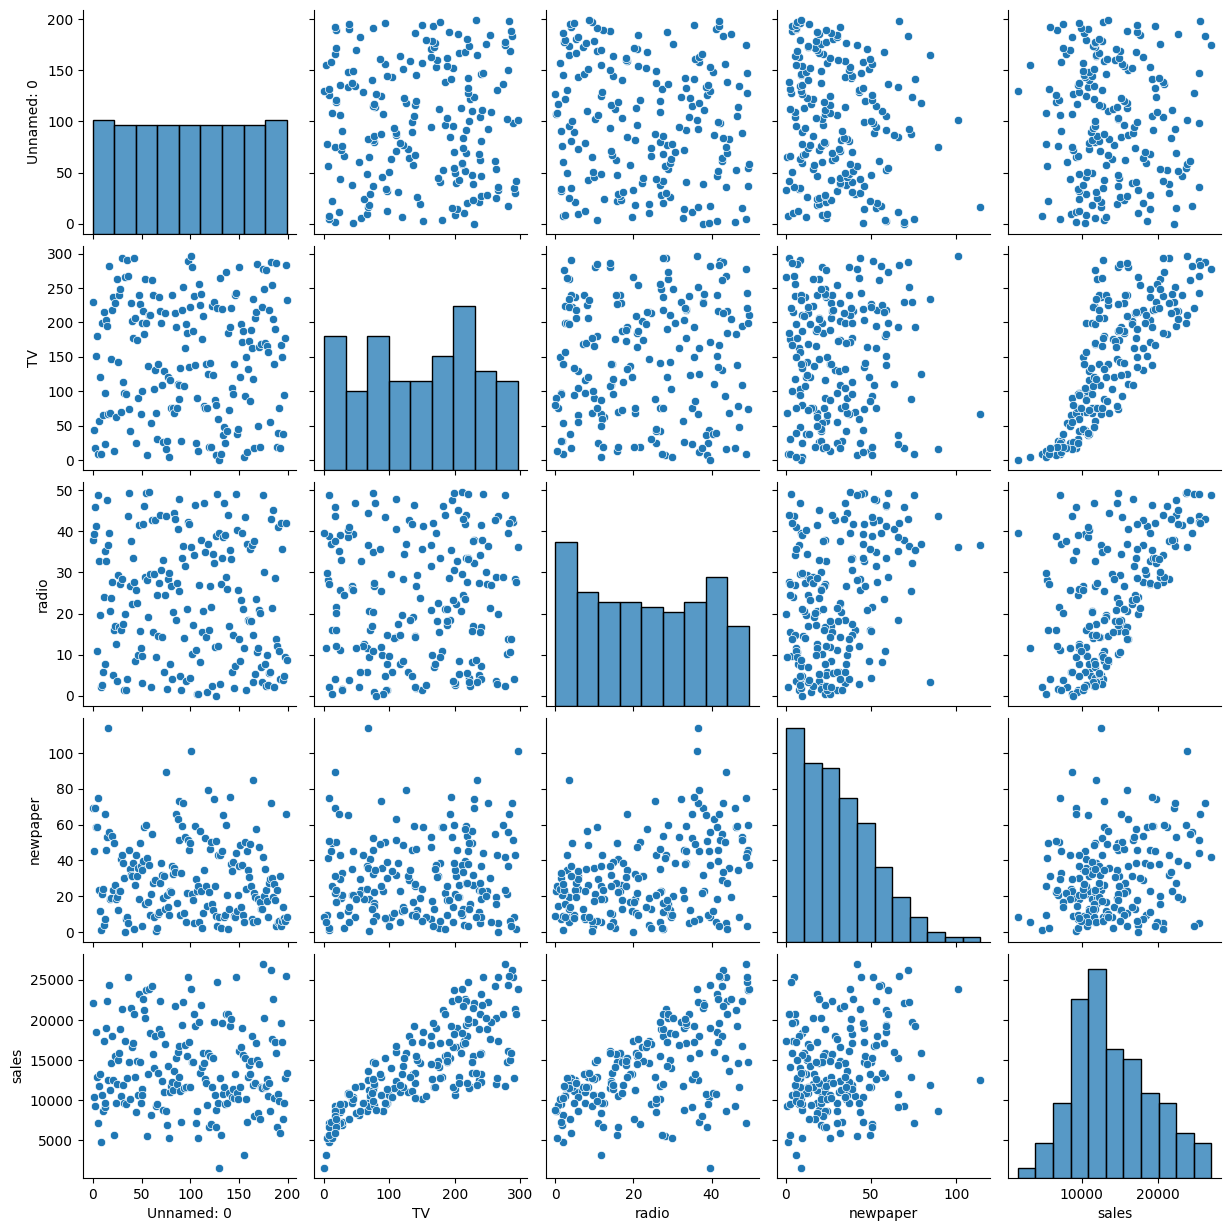

In [124]:
sns.pairplot(df)

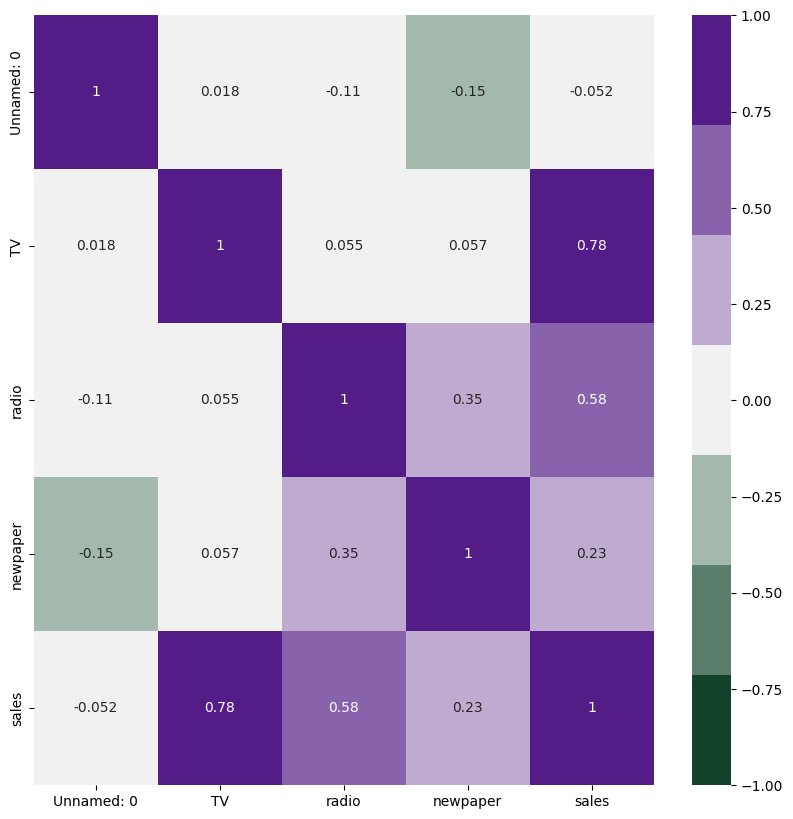

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

* La mayor variable correlacionada con respecto a *"sales"* es: **TV**. Por ello, esta variable debe de ser un predictor.

* La matriz de correlación muestra que *radio* y *newspaper* están correlacionadas. 
  
Vamos a dibujar la relación entre TV y sales

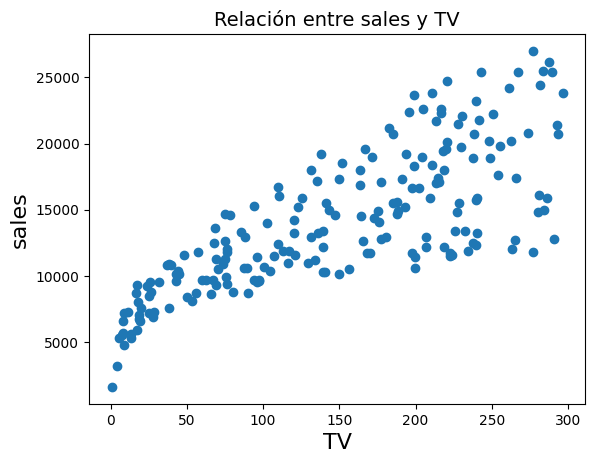

In [126]:
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV', fontsize=16)
plt.ylabel('sales', fontsize=16)
plt.title("Relación entre sales y TV", fontsize=14)
plt.show()

Existe una relación lineal bastante clara con correlación positiva, como se puede ver en la matriz de correlación.

## Modelado

In [127]:
df.describe()

,Unnamed: 0,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,147.042500,23.264000,30.554000,14022.500000
std,57.879185,85.854236,14.846809,21.778621,5217.456566
min,0.000000,0.700000,0.000000,0.300000,1600.000000
25%,49.750000,74.375000,9.975000,12.750000,10375.000000
50%,99.500000,149.750000,22.900000,25.750000,12900.000000
75%,149.250000,218.825000,36.525000,45.100000,17400.000000
max,199.000000,296.400000,49.600000,114.000000,27000.000000


sales=$β_0$+$β_1$⋅TV+$β_2$⋅radio+$β_3$⋅newpaper

In [128]:
# Eliminamos la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Separamos las características (X) y la variable objetivo (y)
X = df.drop('sales', axis=1)
y = df['sales']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#A continación, tenemos que escalar las características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train) # Escalamos los datos de entrenamiento (con las medias y desviaciones tipicas calculadas de X_train)
X_test_scaled = scaler_X.transform(X_test) #Los de test también.

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


#### Linear Regression

In [129]:
modelo = linear_model.LinearRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, modelo.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, modelo.predict(X_test)))

Train MSE: 2705129.423081414
Test MSE: 3174097.3539761053


In [130]:
modelo = linear_model.LinearRegression()

modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, modelo.predict(X_train_scaled)))
print("Test MSE:", metrics.mean_squared_error(y_test, modelo.predict(X_test_scaled)))

Train MSE: 2705129.423081415
Test MSE: 3174097.353976108


## Regularization

#### Ridge Regression

In [131]:
X_train_scaled

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [132]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 0.001)
ridgeR.fit(X_train_scaled, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, modelo.predict(X_train_scaled)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, modelo.predict(X_test_scaled)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_scaled)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_scaled)),2))

Train MSE sin regularización: 2705129.42
Test MSE sin regularización: 3174097.35
Train MSE con regularización: 2705129.42
Test MSE con regularización: 3174116.62


In [133]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 0.01)
ridgeR.fit(X_train_scaled, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, modelo.predict(X_train_scaled)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, modelo.predict(X_test_scaled)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train_scaled)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test_scaled)),2))

Train MSE sin regularización: 2705129.42
Test MSE sin regularización: 3174097.35
Train MSE con regularización: 2705129.51
Test MSE con regularización: 3174290.13


In [167]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
print(np.min(alphas))
print(np.max(alphas))

0.0001
1000.0


In [168]:
#n_alphas = 60
#alphas = np.logspace(-6, 6, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scaled)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [169]:
min(err_ridge)

np.float64(3174099.2809461346)

In [170]:
np.argmin(err_ridge)

np.int64(0)

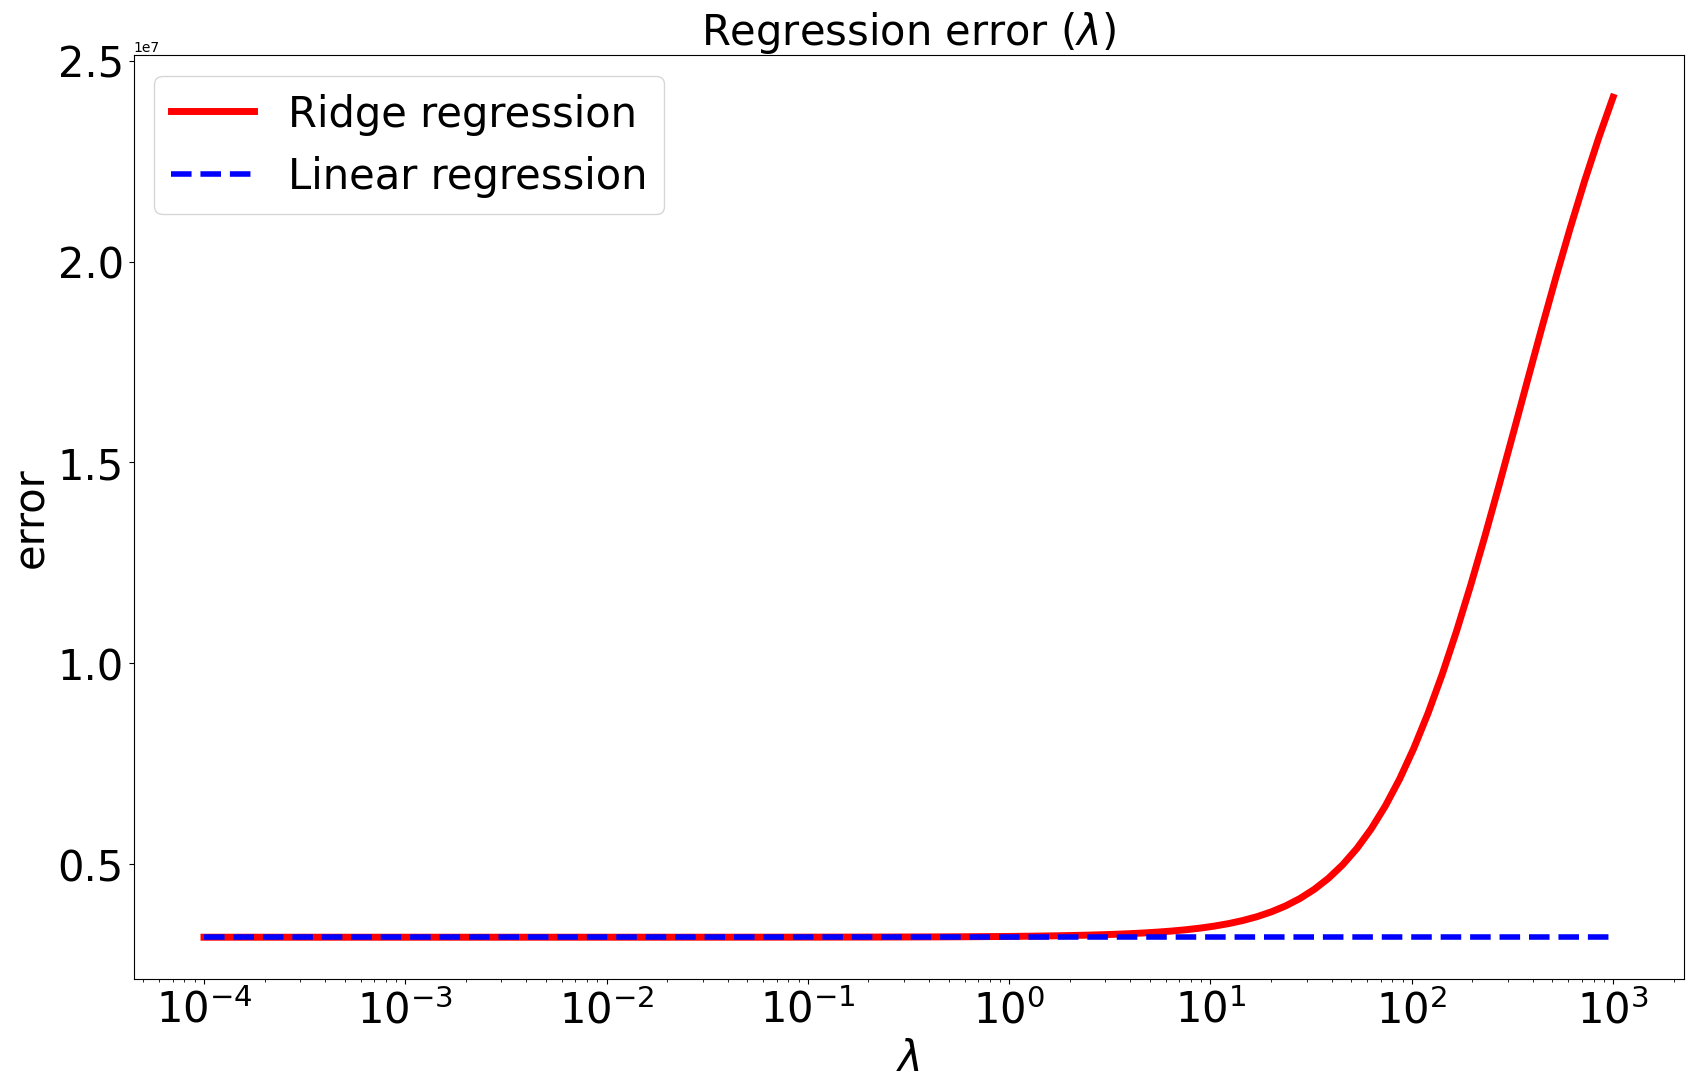

In [171]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
#plt.ylim(3000000,3500000)
plt.show()

In [172]:
coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test_scaled)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

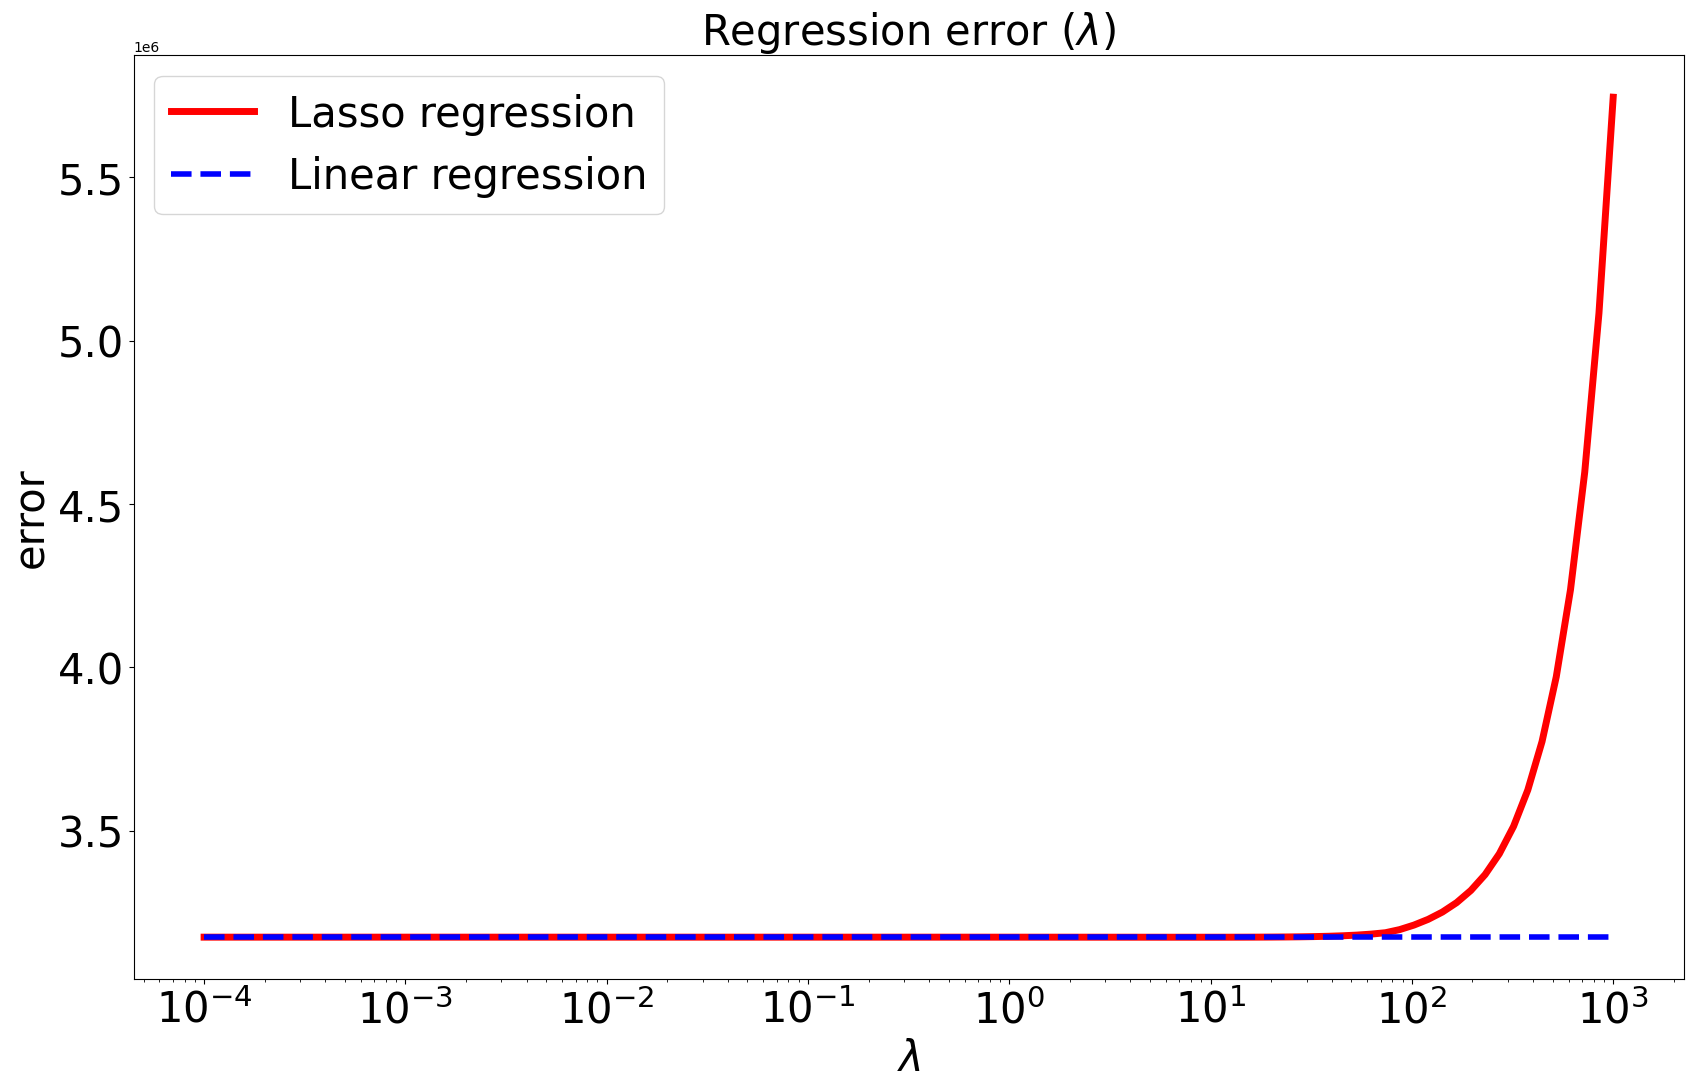

In [173]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
#plt.ylim(3000000,3500000)
plt.show()

In [174]:
min(err_lasso)

np.float64(3173904.896033045)

In [175]:
np.argmin(err_lasso)

np.int64(68)

In [176]:
err_lasso[68]

np.float64(3173904.896033045)

In [177]:
alphas[68]

np.float64(6.4280731172843195)

In [138]:
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 0.00001) 
ridgeR.fit(X_train_scaled, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, ridgeR.predict(X_train_scaled)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, ridgeR.predict(X_test_scaled)))

Train MSE: 2705129.4231
Test MSE: 3174097.5467


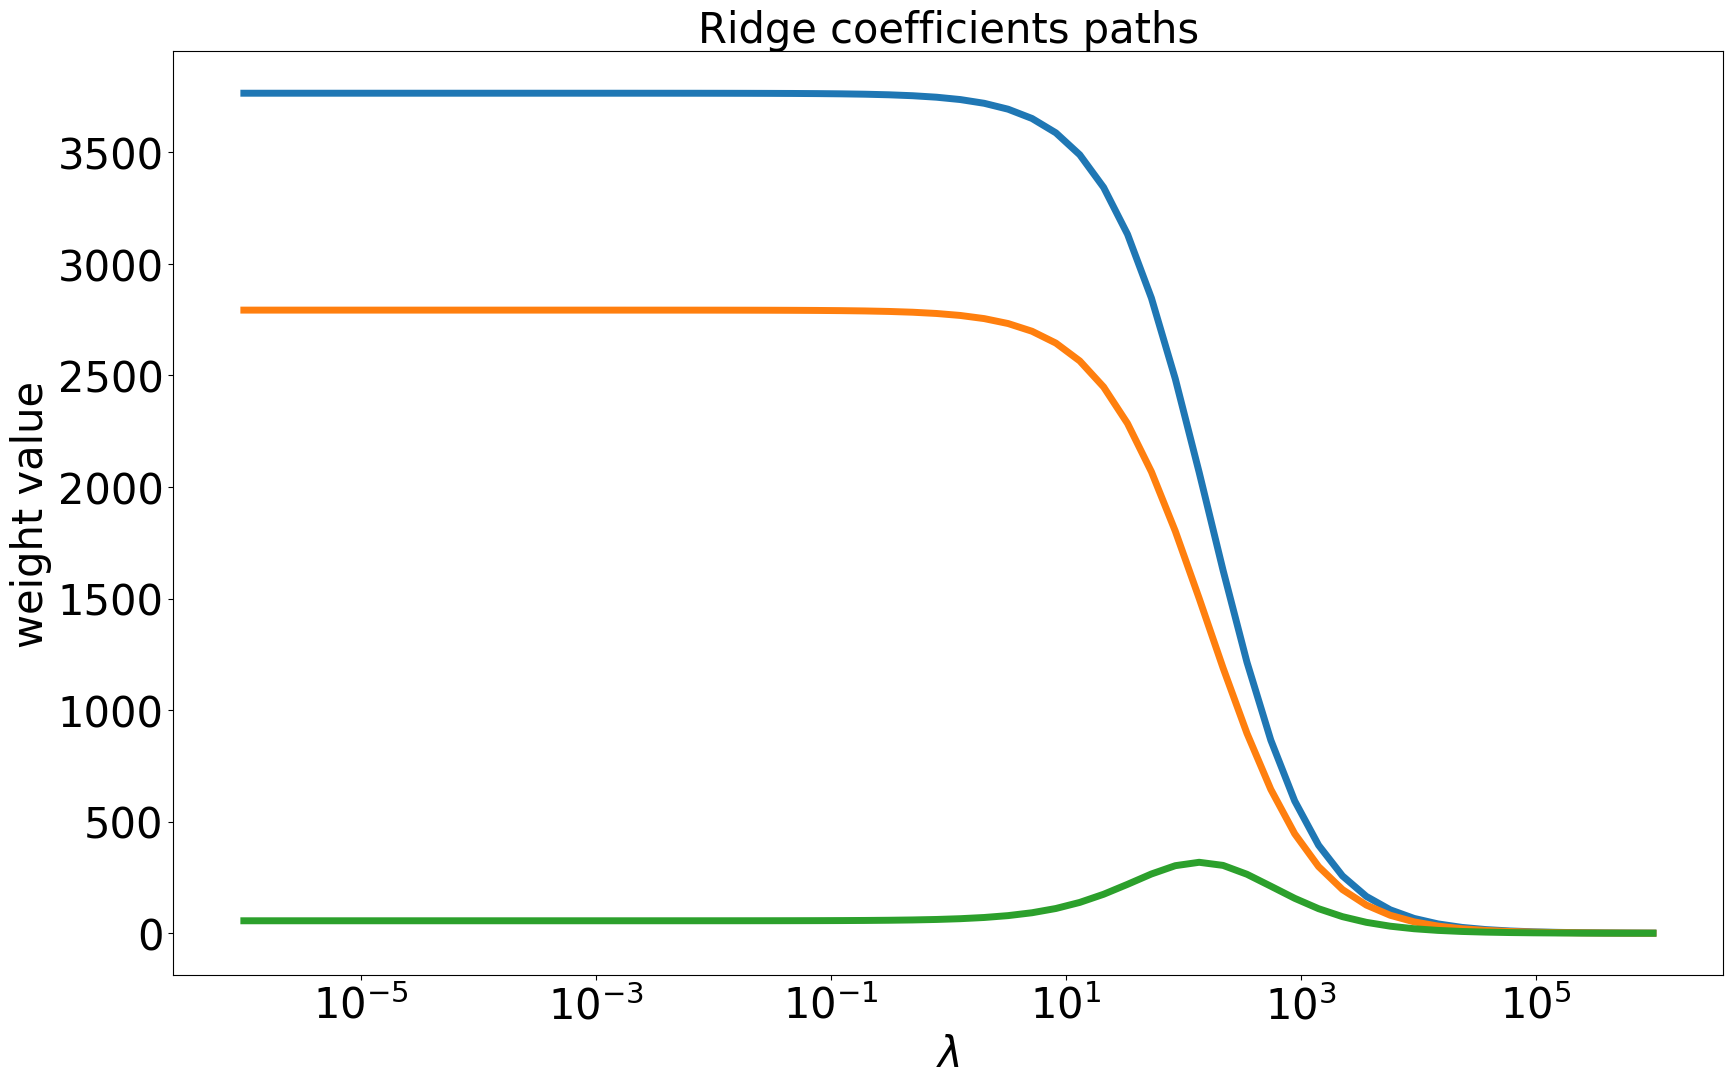

In [139]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_ridge, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title('Ridge coefficients paths', fontsize=30)
plt.show()

#### Lasso

In [140]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train_scaled, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, modelo.predict(X_train_scaled)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, modelo.predict(X_test_scaled)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train_scaled)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test_scaled)))

Train MSE sin regularización: 2705129.42
Test MSE sin regularización: 3174097.35
Train MSE: 2705129.4459
Test MSE: 3174095.3795


In [141]:
lasso = linear_model.Lasso(fit_intercept=False)

coef_lasso = []
err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test_scaled)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

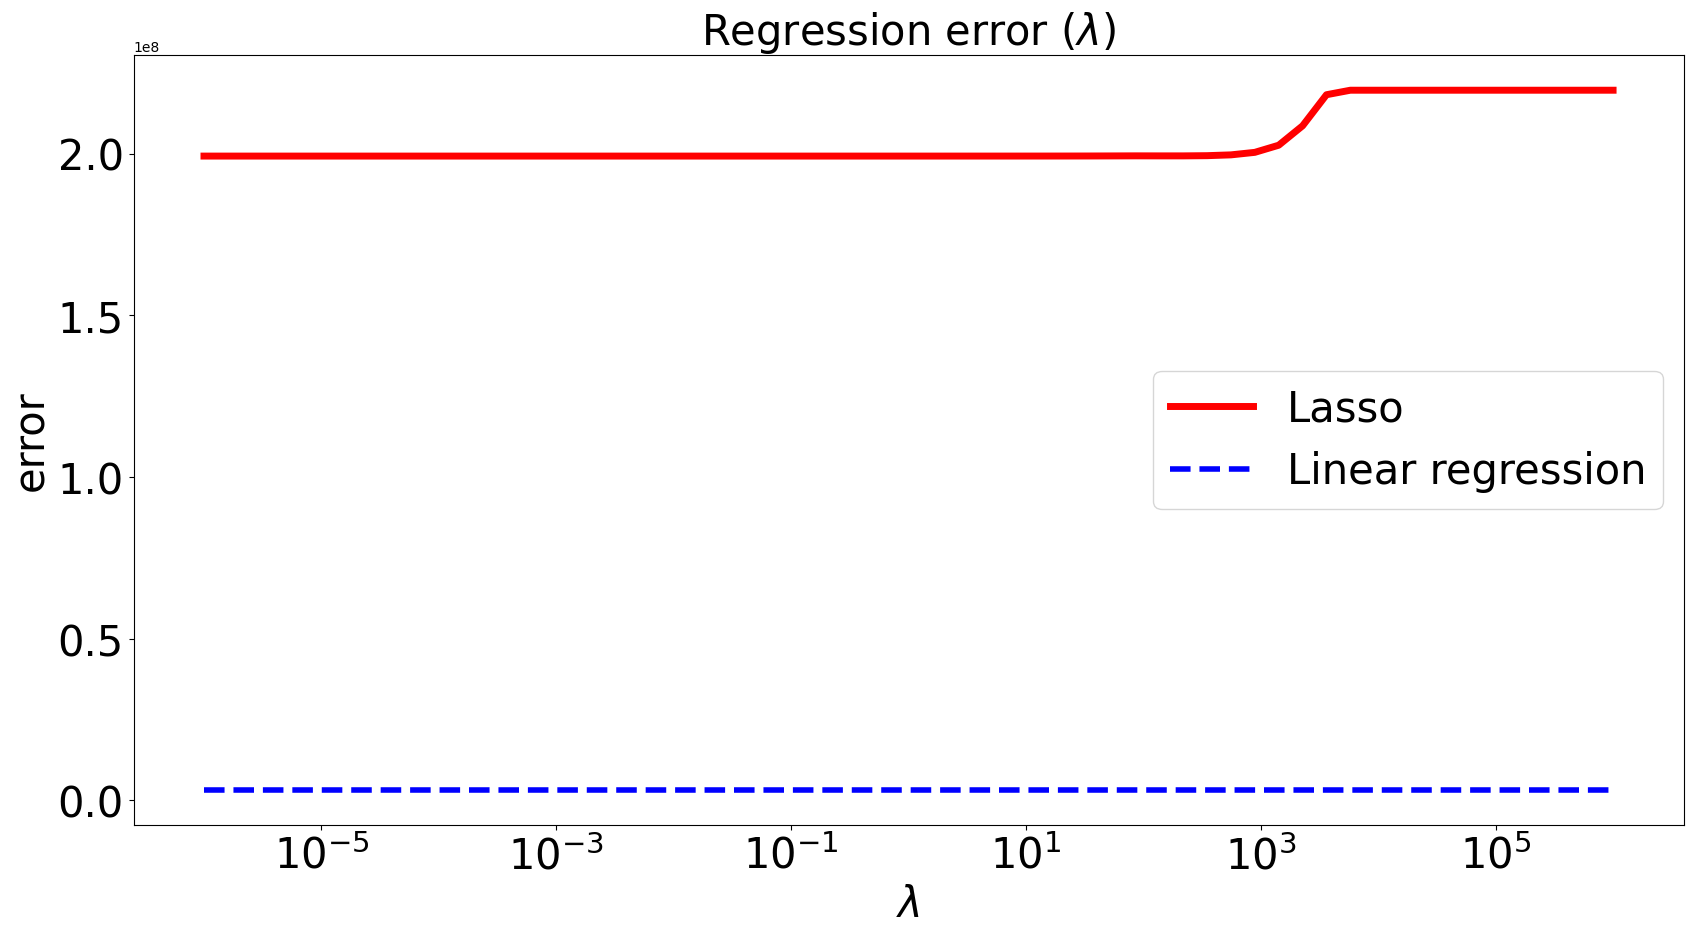

In [142]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [143]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(X_train_scaled, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train_scaled)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test_scaled)))

Train MSE: 2705129.4240
Test MSE: 3174096.8033


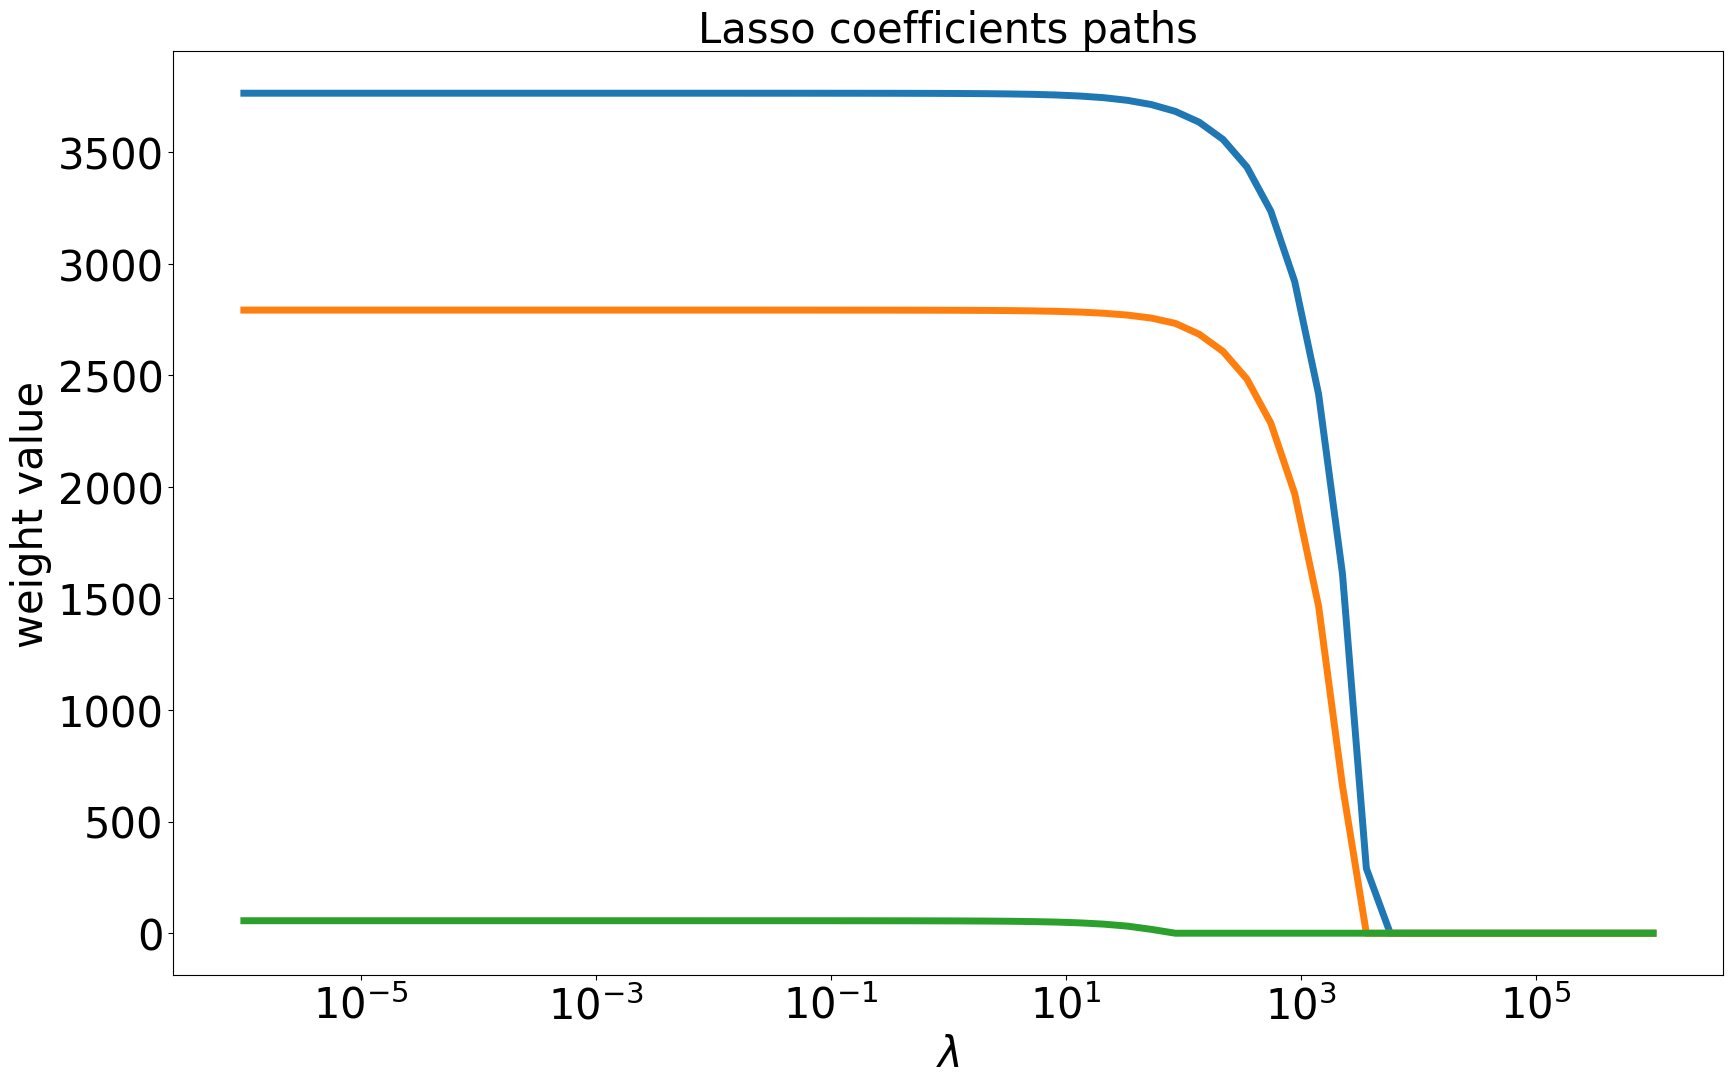

In [144]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_lasso, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title('Lasso coefficients paths', fontsize=30)
plt.show()

In [145]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train_scaled, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_scaled)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_scaled)))

Train MSE: 5099597.5607
Test MSE: 6756186.4417


In [146]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=0.5)
    elastic_net.fit(X_train_scaled, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test_scaled)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)

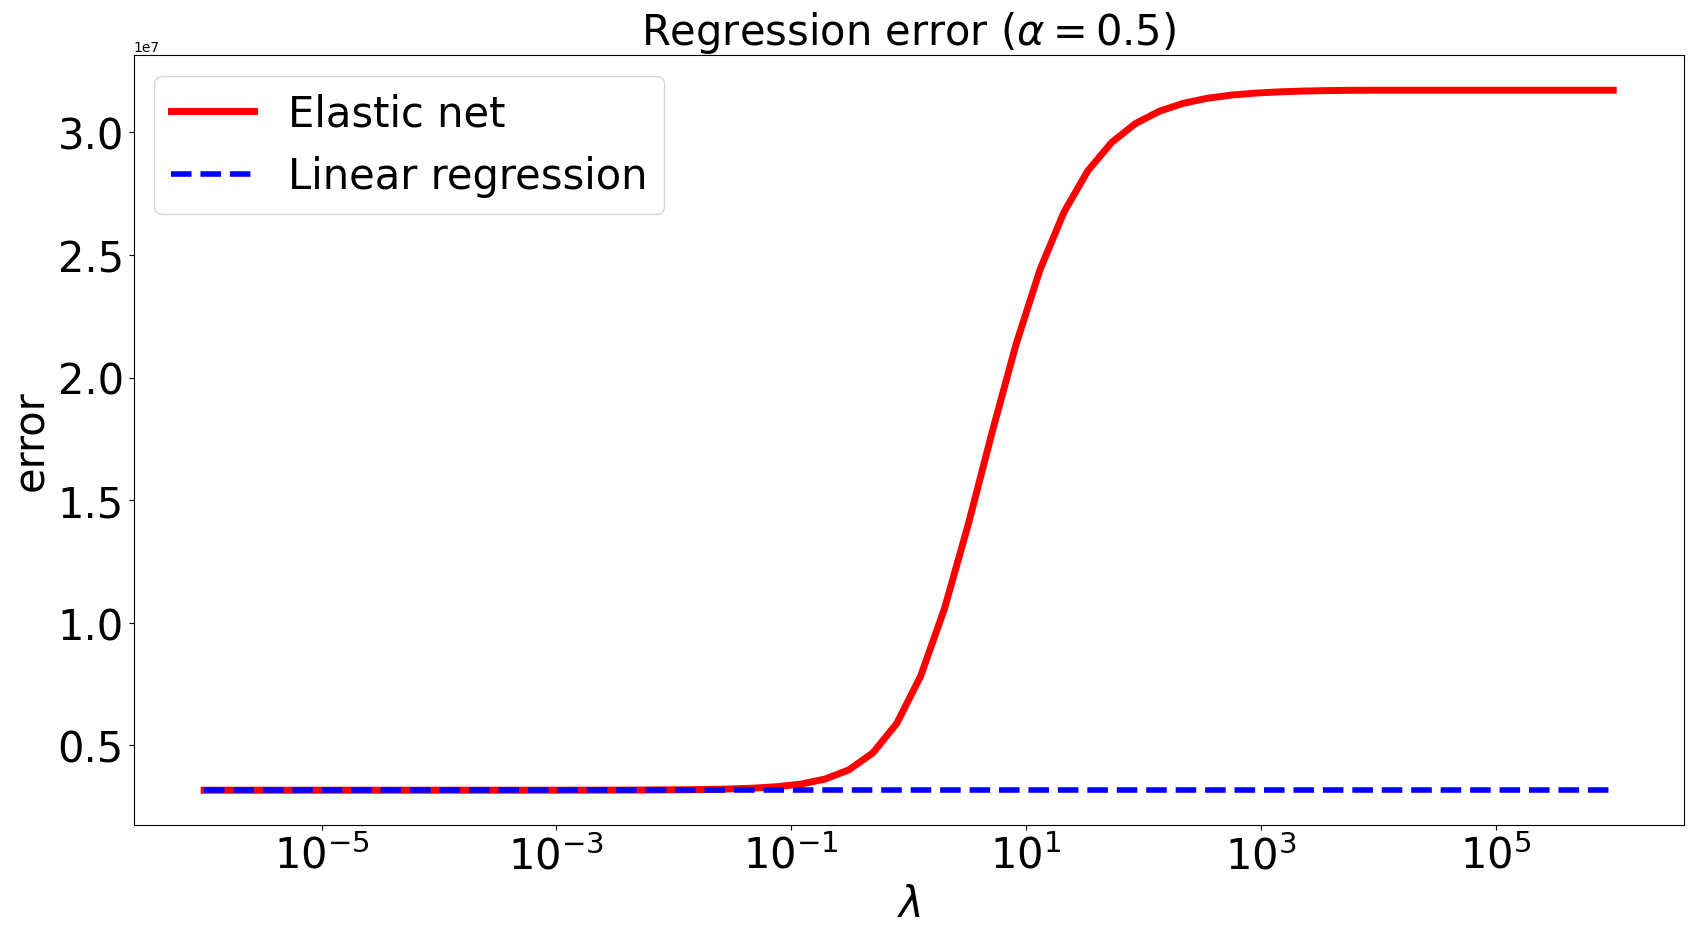

In [147]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_eln, linewidth=5, color='red', label="Elastic net")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=30)
plt.show()

In [148]:
elastic_net = ElasticNet(alpha = 0.08, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_scaled)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_scaled)))

Train MSE: 2737676.5346
Test MSE: 3327346.5091


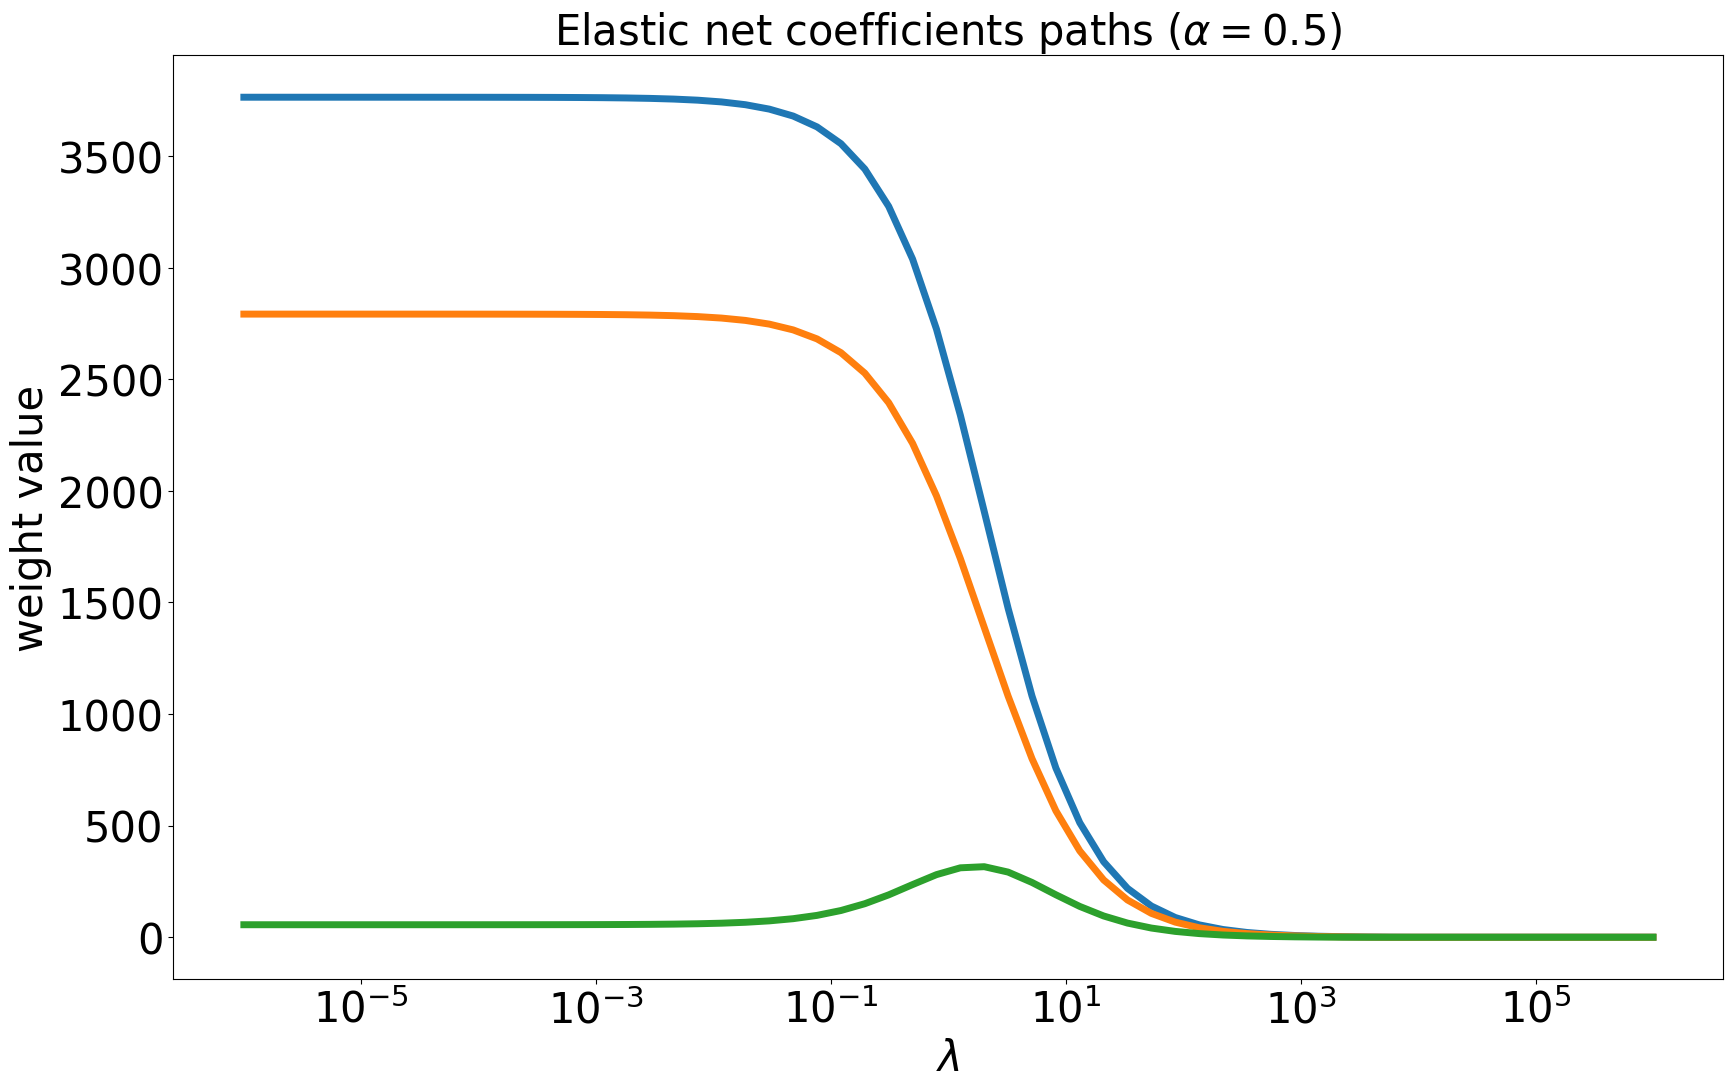

In [149]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_eln, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title(r'Elastic net coefficients paths ($\alpha=0.5$)', fontsize=30)
plt.show()

In [150]:
print("Linear regression error:   %0.4f" % baseline_error)    
print("Minimun ridge error:       %0.4f" % min(err_ridge))
print("Minimum lasso error:       %0.4f" % min(err_lasso))
print("Minimum elastic net error: %0.4f" % min(err_eln))

Linear regression error:   3174097.3540
Minimun ridge error:       3174097.3732
Minimum lasso error:       199233999.5413
Minimum elastic net error: 3174098.8955


# (Explicación contaminación entre train y test)

## Resultados